Name : Jainam Rajput

SAP ID : 60009200022

Div/Batch : K/K1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter

### First Dataset - India Exchange Rate

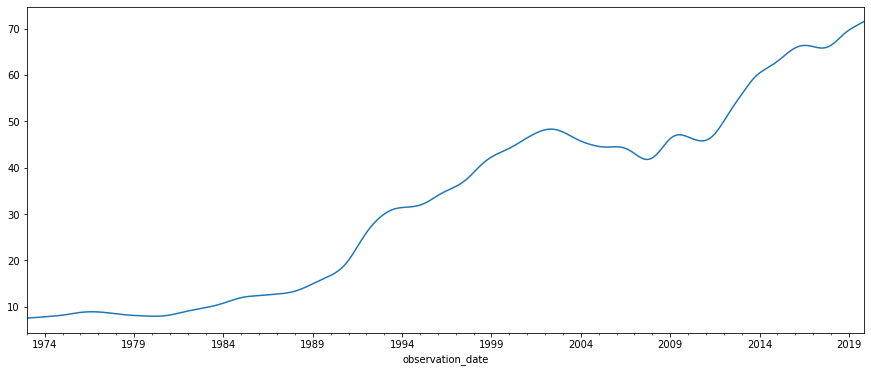

In [ ]:
df = pd.read_csv(r'/content/India_Exchange_Rate_Dataset.csv', index_col=0,parse_dates=True)


In [ ]:
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


#### Pandas Differencing

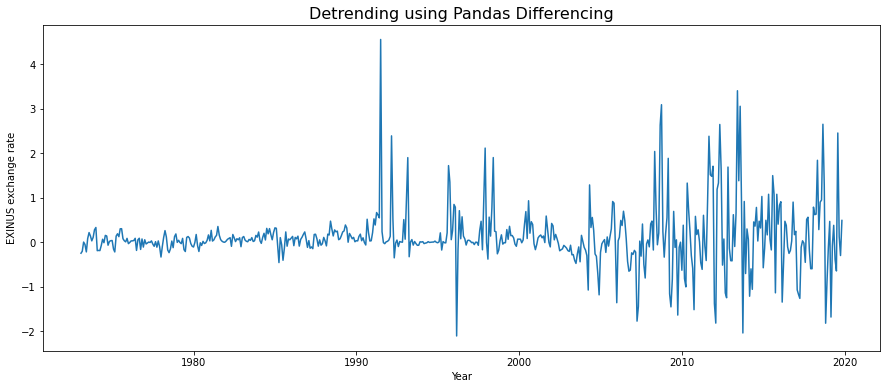

In [ ]:
diff = df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)

plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

#### Signal Detrending 

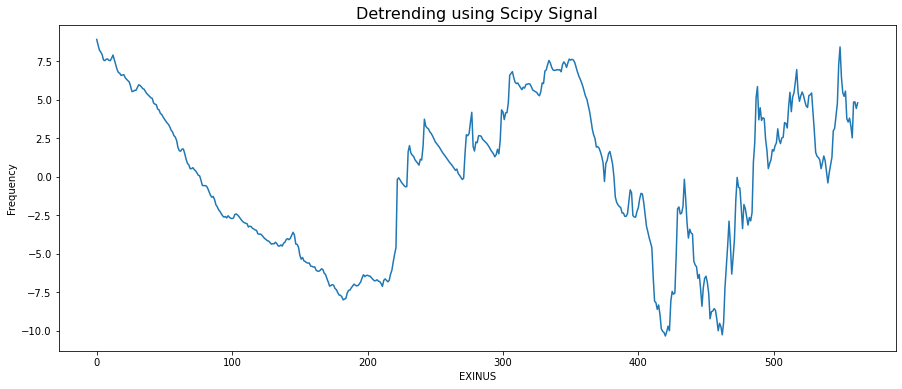

In [ ]:
from scipy import signal
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()


#### HP Filter

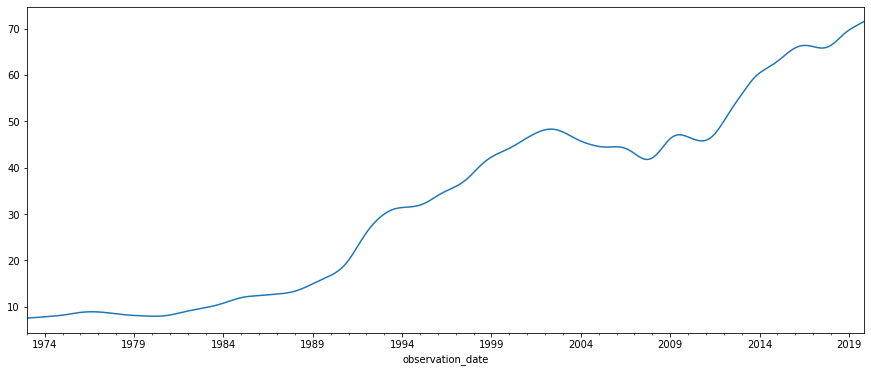

In [ ]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

Text(0, 0.5, 'EXINUS exchange rate')

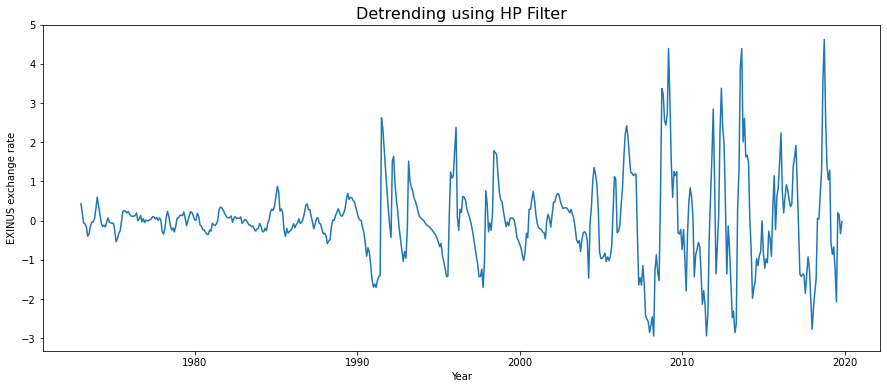

In [ ]:
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')


### Second Dataset - Shampoo.csv

In [ ]:
df1 = pd.read_csv('/content/shampoo.csv',index_col=0,parse_dates=True)
df1.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


#### Pandas Differencing

In [ ]:
X = df1.values

In [ ]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [ ]:
diff = []
for i in range(1,len(X)):
  d = X[i] - X[i-1]
  diff.append(d)
print(diff)

[array([-120.1]), array([37.2]), array([-63.8]), array([61.]), array([-11.8]), array([63.3]), array([-7.3]), array([-31.7]), array([-69.9]), array([213.6]), array([-150.6]), array([8.4]), array([-44.8]), array([60.6]), array([63.2]), array([-81.9]), array([95.6]), array([-61.]), array([77.6]), array([-13.7]), array([131.7]), array([-157.1]), array([77.8]), array([-2.6]), array([100.7]), array([-124.5]), array([123.4]), array([-38.]), array([36.1]), array([138.1]), array([-167.9]), array([274.4]), array([-206.7]), array([106.]), array([65.6])]


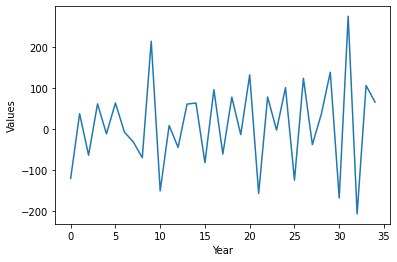

In [ ]:
plt.plot(diff)
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

#### Signal DeTrends

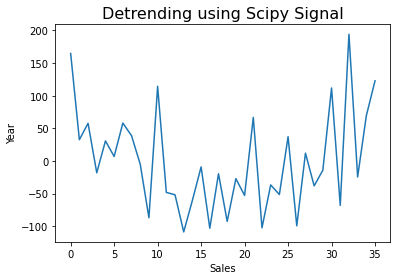

In [ ]:
from scipy import signal
detrended = signal.detrend(df1.Sales.values)

plt.plot(detrended)
plt.xlabel('Sales')
plt.ylabel('Year')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

#### HP Filter

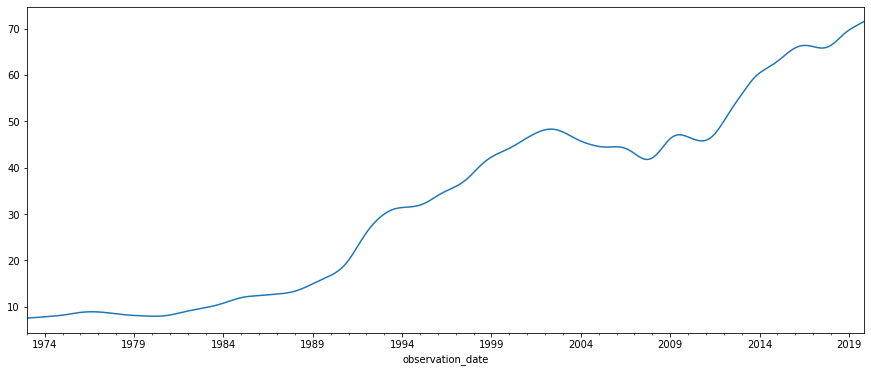

In [ ]:
Sales_cycle,Sales_trend = hpfilter(df1['Sales'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

Text(0, 0.5, 'EXINUS exchange rate')

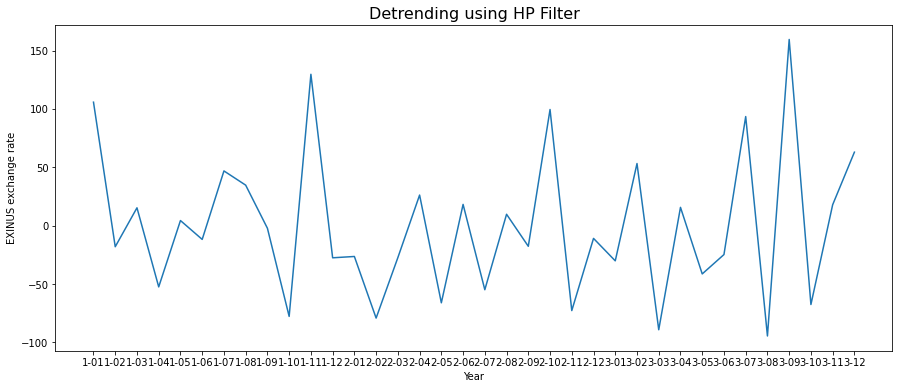

In [ ]:
df1['trend'] = Sales_trend
detrended = df1.Sales - df1['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')


### Third Dataset - Tesla Stock Price

In [ ]:
data = pd.read_csv('/content/tesla.csv',index_col=0,parse_dates=True)
data.head()

,High
Date,
2010-06-29,25.00
2010-06-30,30.42
2010-07-01,25.92
2010-07-02,23.10
2010-07-06,20.00


In [ ]:
X = data.values
X

array([[ 25.      ],
       [ 30.42    ],
       [ 25.92    ],
       ...,
       [261.      ],
       [265.75    ],
       [265.329987]])

#### Pandas Differencing

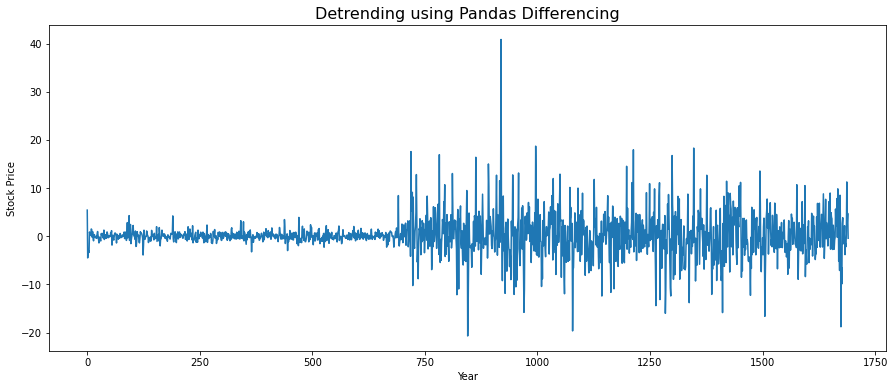

In [ ]:
diff = list()
for i in range(1, len(X)):
  value = X[i] - X[i - 1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()

#### Signal Detrends

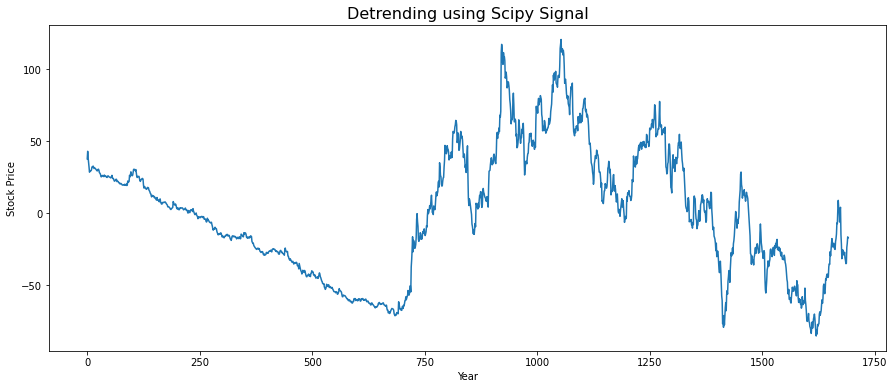

In [ ]:
detrended = signal.detrend(data.High.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

#### HP Filter

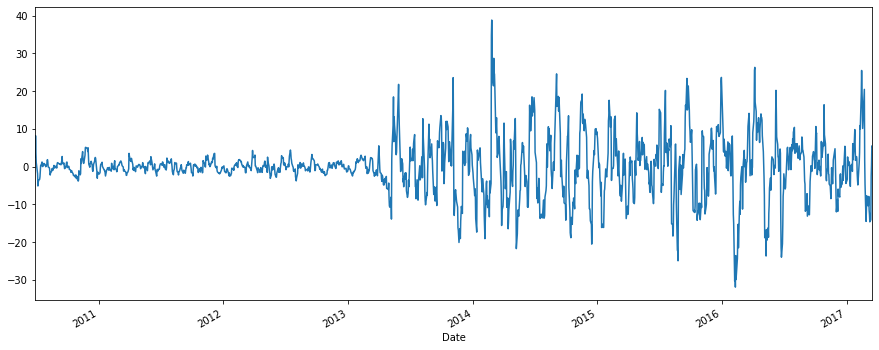

In [ ]:
Stock_cycle,Stock_trend = hpfilter(data['High'], lamb=14400)
Stock_cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

Text(0, 0.5, 'Stock Price')

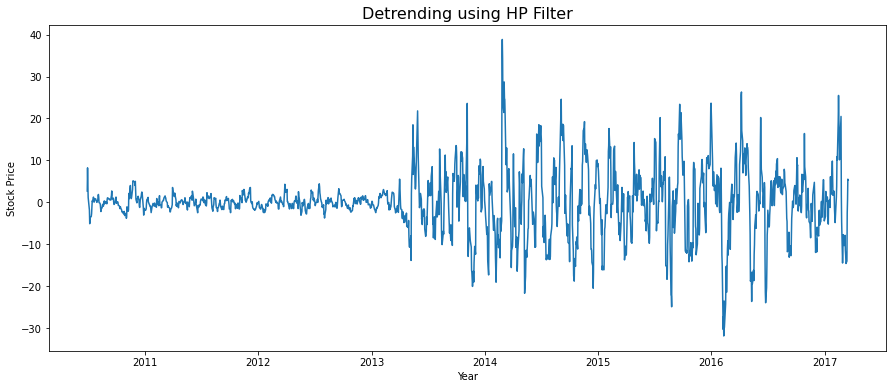

In [ ]:
data['Trend'] = Stock_trend
detrended = data.High - data['Trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price')

# Selected Datasets

In [ ]:
df = pd.read_csv('/content/Daily_Electricity_Consumption.csv',index_col=0,parse_dates=True)

In [ ]:
df.head()

,usage,cost
Date,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84


## Pandas Differencing

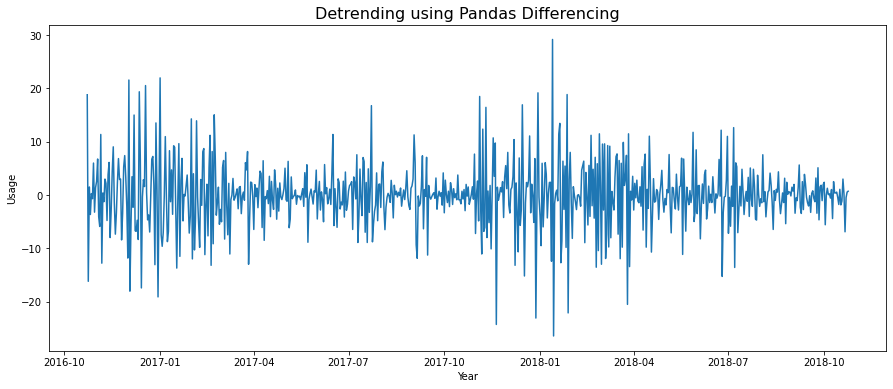

In [ ]:
diff = df.usage.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)

plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Usage')
plt.show()

## Signal Detrending

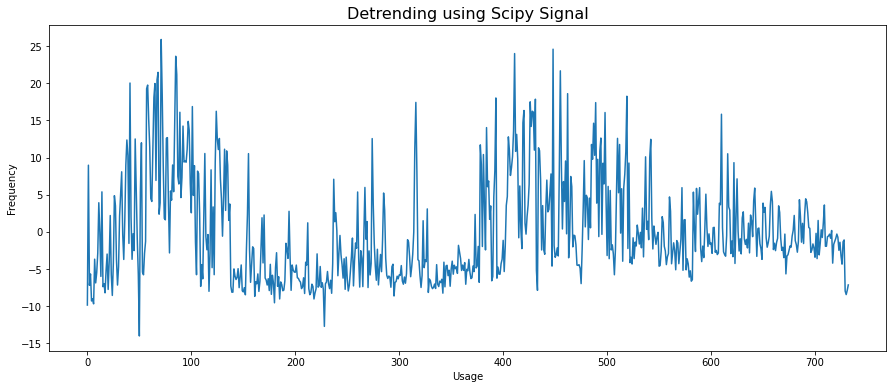

In [ ]:
from scipy import signal
detrended = signal.detrend(df.usage.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

## Using HP Filter

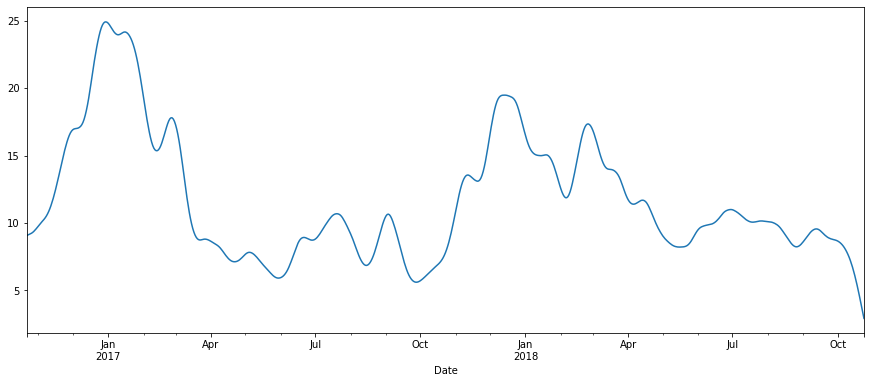

In [ ]:
Usage_cycle,Usage_trend = hpfilter(df['usage'], lamb=1600)
Usage_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

## From Scratch

Text(0, 0.5, 'Usage exchange rate')

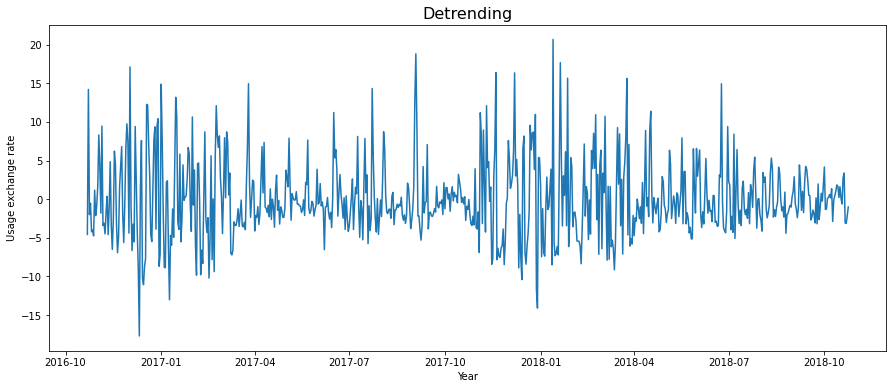

In [ ]:
df['trend'] = Usage_trend
detrended = df.usage - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Usage exchange rate')
